# Oil & Gas Price Predictions based on ARIMA Model:

1.) Import the required libraries

2.) Import the dataset and review the data frame

3.) Test for stationarity

4.) Seasonal Decomposition 

5.) Plot Acf and Pcf functions

6.) Fitting Arima Model

7.) Predictions based on Model

# Importing reaquired libraries

In [307]:
%matplotlib inline
import matplotlib
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
from matplotlib import rcParams
plt.rcParams['figure.figsize'] = (30, 20)
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'xx-large',
          'figure.figsize': (30, 20),
         'axes.titlesize':'xx-large',
         'xtick.labelsize':'xx-large',
         'ytick.labelsize':'xx-large'}
pylab.rcParams.update(params)
import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

# importing  oil Data 

In [308]:
df=pd.read_csv("Oil and Gas 1932-2014.csv")



In [309]:
## SElecting the features for data 
df1= pd.DataFrame(df["year"])
df2=df["oil_price_2000"]
df3=df1.join(df2)
df3=pd.DataFrame(df3)
print(df3)

       year  oil_price_2000
0      1932       10.860860
1      1933        8.815239
2      1934       12.715790
3      1935       12.039690
4      1936       13.383210
...     ...             ...
15516  2010       62.778052
15517  2011       85.170708
15518  2012       83.754465
15519  2013       80.319530
15520  2014       71.972588

[15521 rows x 2 columns]


# Importing gas data

In [310]:

df1= pd.DataFrame(df["year"])

df4=df["gas_price_nom"]

df5=df1.join(df4)
df5=pd.DataFrame(df5)
df5

,year,gas_price_nom
0,1932,0.060000
1,1933,0.060000
2,1934,0.060000
3,1935,0.060000
4,1936,0.060000
...,...,...
15516,2010,4.480000
15517,2011,3.950000
15518,2012,2.660000
15519,2013,3.707290


# checking missing values in Oil Data and  replace it by mean values

In [311]:

df3.isnull().sum()
x = df3.mean()
y = round(x,2)
df3= df3.fillna(y)

df3.isnull().sum()


year              0
oil_price_2000    0
dtype: int64

# checking missing values in Gas dataset and replace it by mean values

In [312]:

df5.isnull().sum()
x = df5.mean()
y = round(x,2)
df5= df5.fillna(y)

df5.isnull().sum()

year             0
gas_price_nom    0
dtype: int64

In [313]:
df3.head(-10)

,year,oil_price_2000
0,1932,10.860860
1,1933,8.815239
2,1934,12.715790
3,1935,12.039690
4,1936,13.383210
...,...,...
15506,2000,28.500010
15507,2001,23.698000
15508,2002,23.715330
15509,2003,26.541070


In [314]:
df5.head(-10)

,year,gas_price_nom
0,1932,0.06
1,1933,0.06
2,1934,0.06
3,1935,0.06
4,1936,0.06
...,...,...
15506,2000,3.68
15507,2001,4.00
15508,2002,2.95
15509,2003,4.88


In [315]:
ts=df3['oil_price_2000']


# Test for Stationarity

Check for Stationarity in a series? Plotting Rolling Statistics: Plot the moving average or moving variance and see if it varies with time. By moving average/variance I mean that at any instant ‘t’, we’ll take the average/variance of the last year, i.e. last 12 months. But again this is more of a visual technique.

Dickey-Fuller Test: This is one of the statistical tests for checking stationarity. Here the null hypothesis is that the time series is non-stationary. The test results comprise of a Test Statistic and some Critical Values for difference confidence levels. If the ‘Test Statistic’ is less than the ‘Critical Value’, we can reject the null hypothesis and say that the series is stationary.

Statistical tests make strong assumptions about your data. They can only be used to inform the degree to which a null hypothesis can be accepted or rejected. The result must be interpreted for a given problem to be meaningful.

Null Hypothesis (H0): If accepted, it suggests the time series has a unit root, meaning it is non-stationary. It has some time dependent structure.

Alternate Hypothesis (H1): The null hypothesis is rejected; it suggests the time series does not have a unit root, meaning it is stationary. It does not have time-dependent structure. We interpret this result using the p-value from the test.

A p-value below a threshold (such as 5% or 1%) suggests we reject the null hypothesis (stationary), otherwise a p-value above the threshold suggests we accept the null hypothesis (non-stationary).

p-value > 0.05: Accept the null hypothesis (H0), the data has a unit root and is non-stationary.

p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.

# Stationarity test for Oil Data

In [316]:
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    ##rolmean = pd.rolling_mean(timeseries, window=20).mean()
    ##rolstd = pd.rolling_std(timeseries, window=20).std()
   ## rolmean = pd.rolling(timeseries, window=5).mean()
    ##rolstd = pd.rolling(timeseries, window=5).std()
    df3['rolmean'] =timeseries.rolling(5).mean()
    df3['rolstd']=timeseries.rolling(5).std()

    #Plot rolling statistics:
   # #orig = plt.plot(timeseries, color='blue',label='Original')
    ##mean = plt.plot(rolmean, color='red', label='Rolling Mean')
   # std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    orig = sns.lineplot(y='oil_price_2000',x='year', data=df3, color='blue',label='Original')
    mean = sns.lineplot(y='rolmean',  x='year', data=df3,color='red', label='Rolling Mean')
    std = sns.lineplot(y='rolstd', x='year', data=df3, color='black', label = 'Rolling Std')
    plt.style.use("ggplot")
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

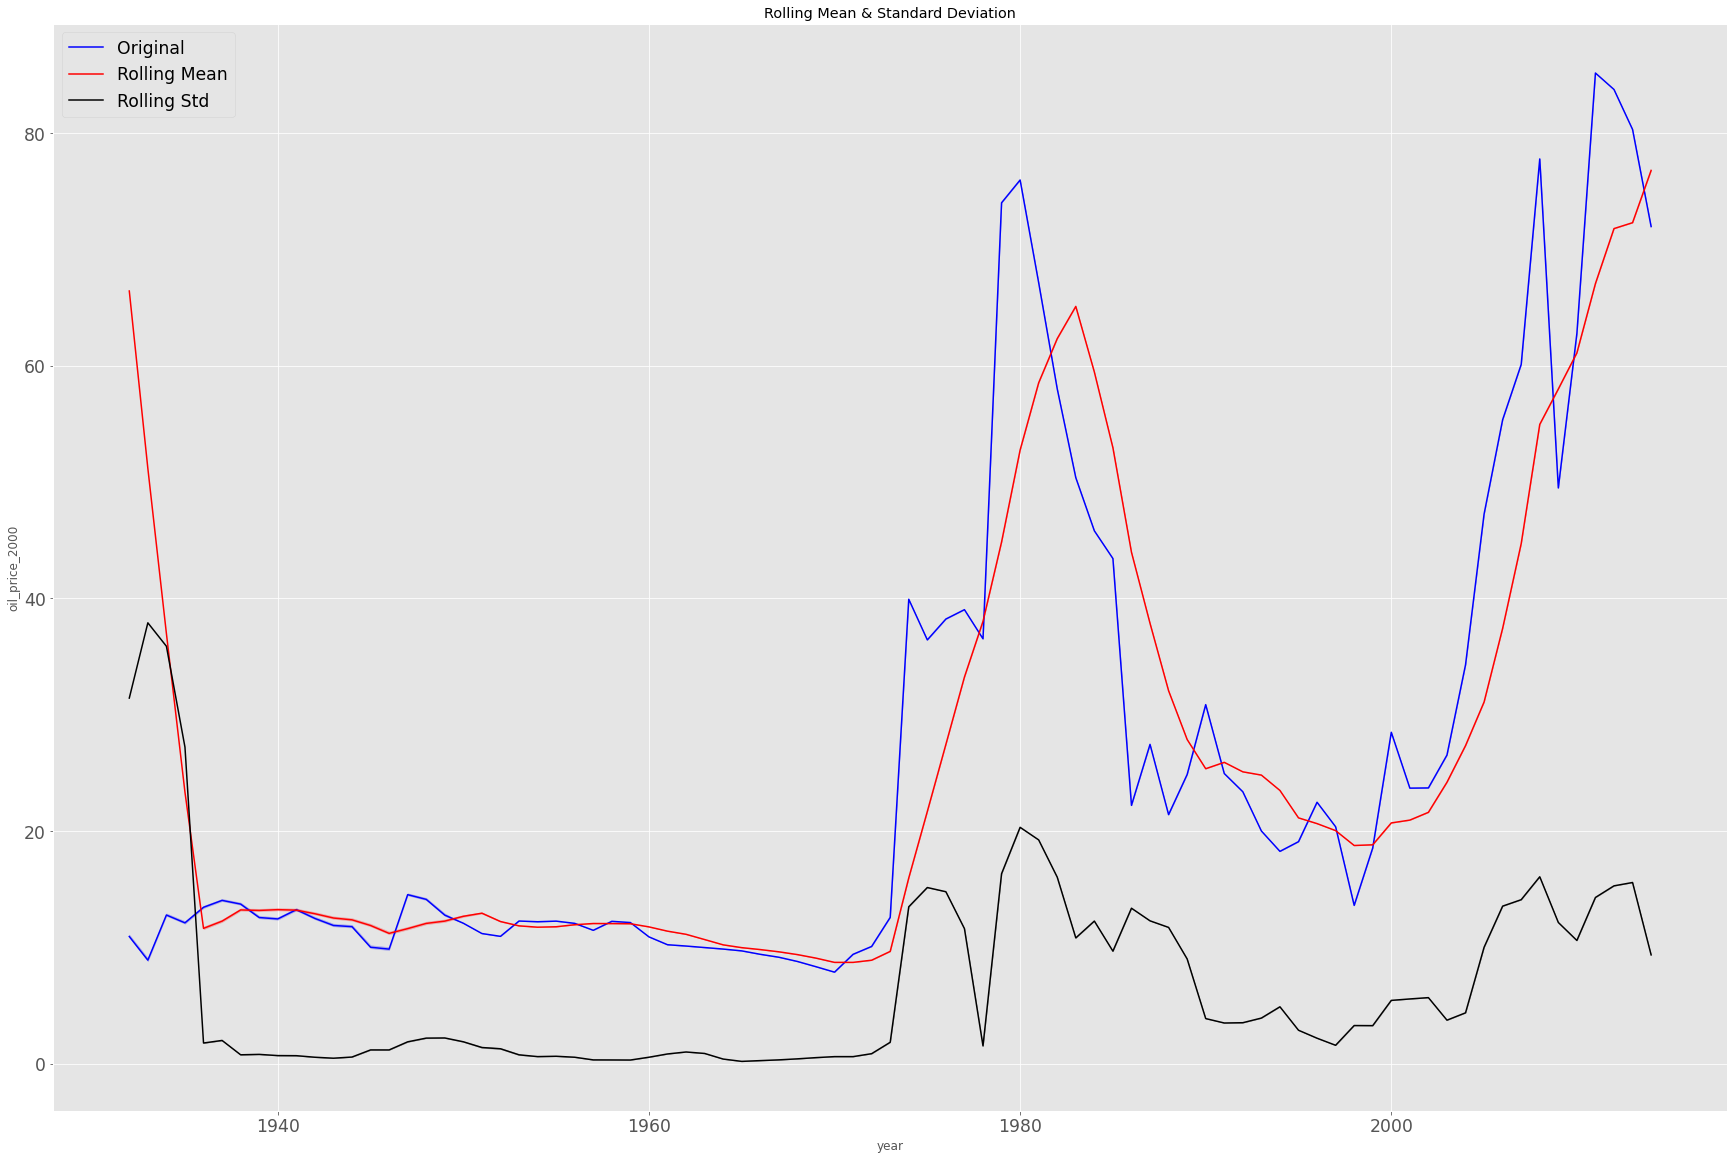

Results of Dickey-Fuller Test:
Test Statistic                   -33.533378
p-value                            0.000000
#Lags Used                        43.000000
Number of Observations Used    15477.000000
Critical Value (1%)               -3.430773
Critical Value (5%)               -2.861727
Critical Value (10%)              -2.566869
dtype: float64


In [317]:
test_stationarity(ts)

This show that the Null hypothesis is rejected, i.e. data is not stationary
Make a Time Series Stationary There are 2 major reasons behind non-stationaruty of a TS:

1.Trend – varying mean over time. For eg, in this case we saw that on average, the oil prices are growing over time.

2.Seasonality – variations at specific time-frames.


In [318]:
df3["ts_log"] =np.log(ts)

# Decomposition of timeseries For Oil Data

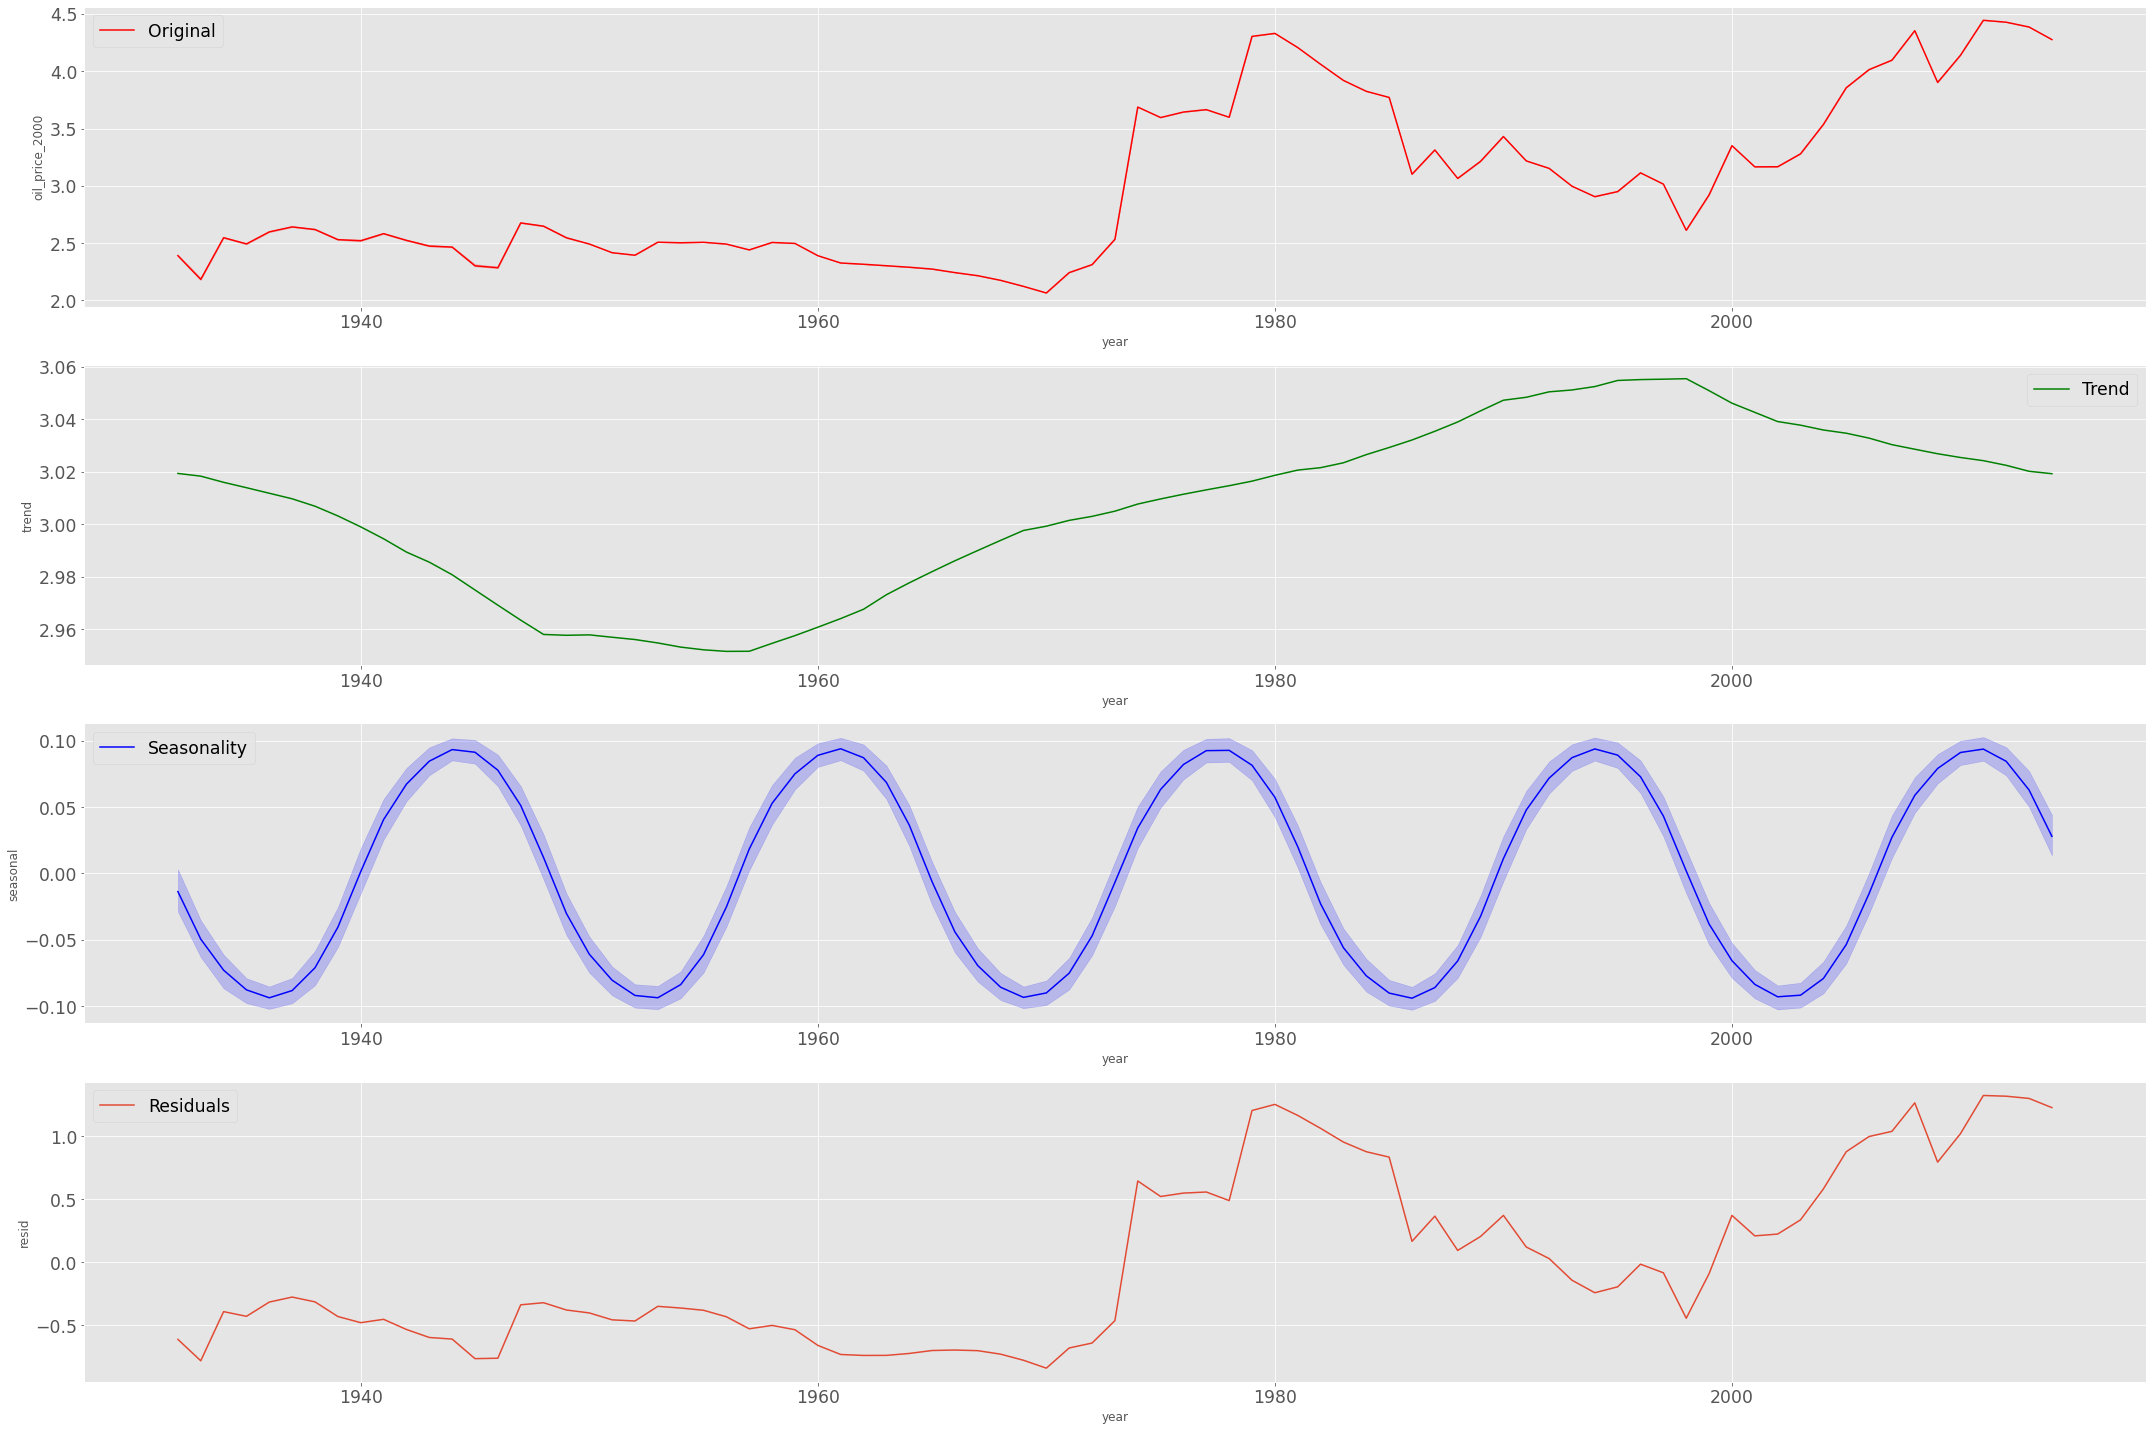

In [319]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts_log =  np.log(ts)

decomposition = seasonal_decompose(ts_log, freq = 365)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

plt.subplot(411)
sns.lineplot(y=ts_log, x='year',data=df3,label='Original',color="red")
plt.legend(loc='best')
plt.subplot(412)
sns.lineplot(y=trend,x='year', data=df3, label='Trend',color="green")
plt.legend(loc='best')
plt.subplot(413)
sns.lineplot(y=seasonal,x='year',data=df3,label='Seasonality',color="blue")
plt.legend(loc='best')
plt.subplot(414)
sns.lineplot(y=residual,x='year',data=df3, label='Residuals')
plt.legend(loc='best')
plt.tight_layout()

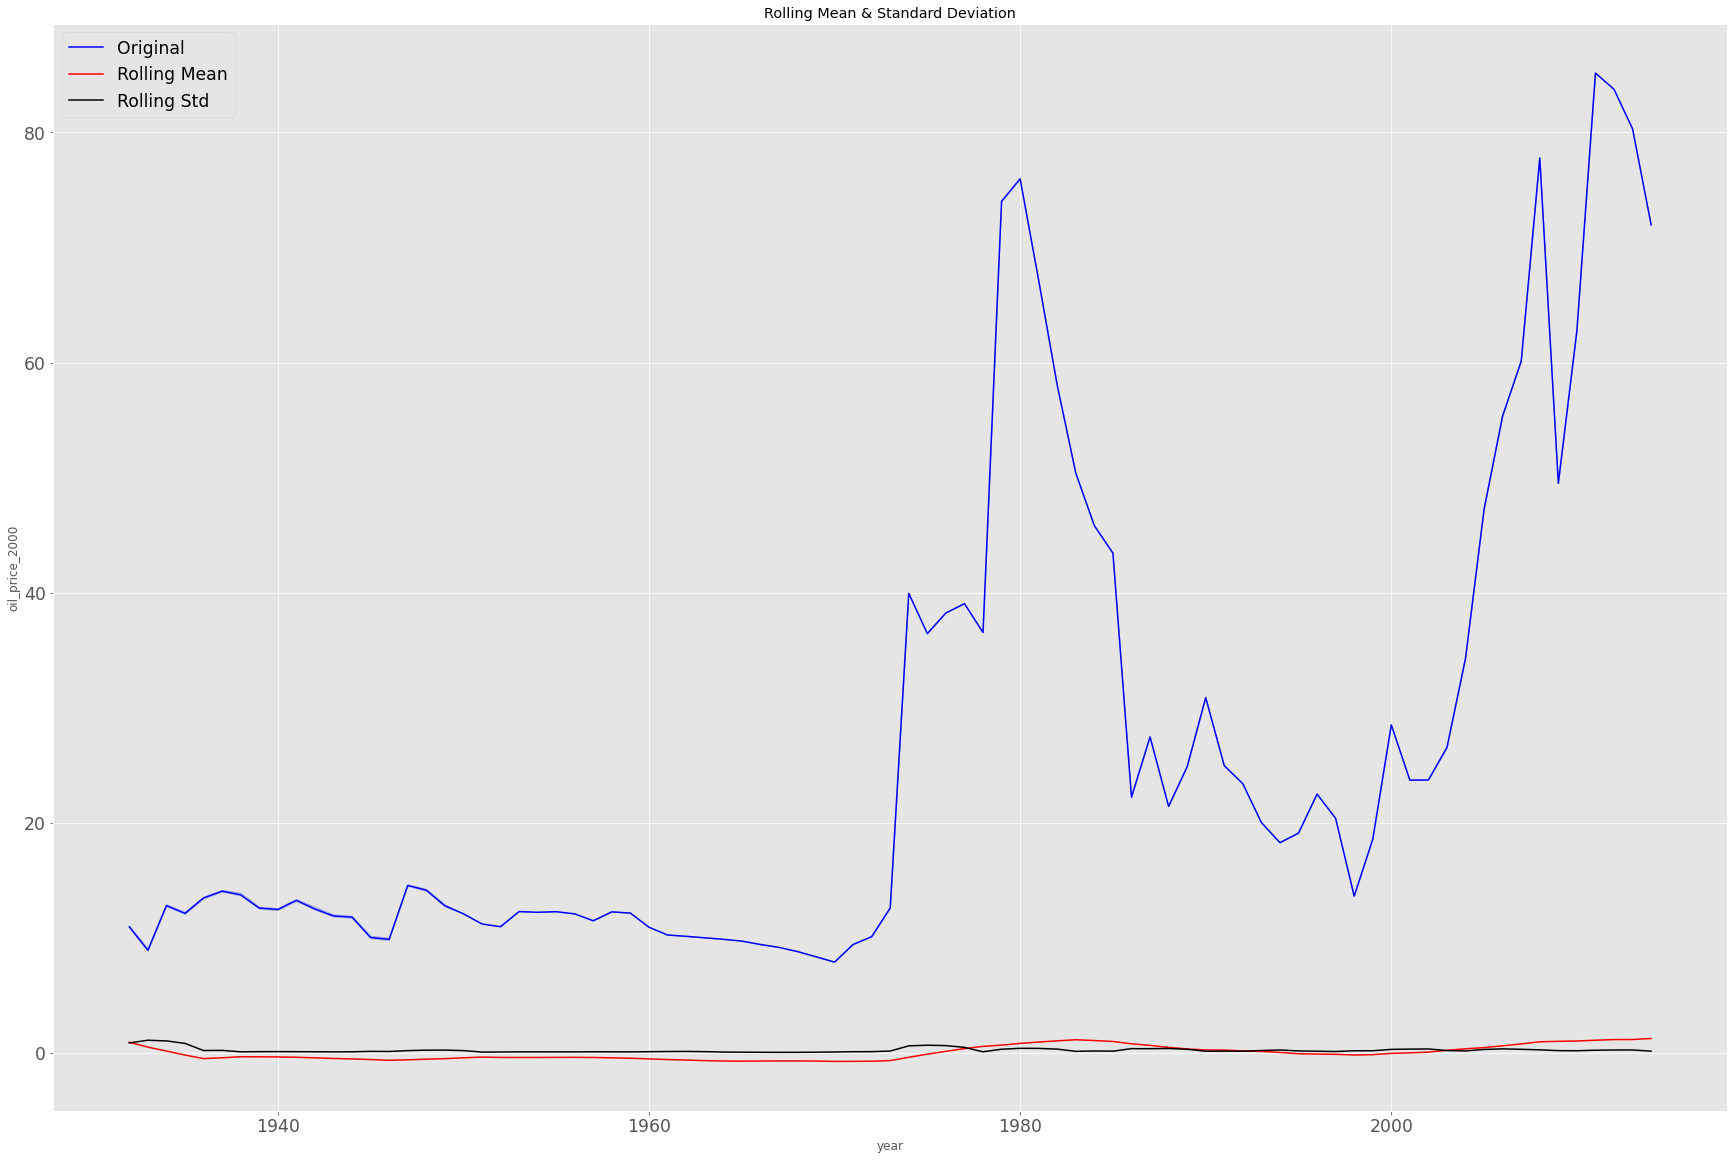

Results of Dickey-Fuller Test:
Test Statistic                   -34.220583
p-value                            0.000000
#Lags Used                        43.000000
Number of Observations Used    15113.000000
Critical Value (1%)               -3.430783
Critical Value (5%)               -2.861731
Critical Value (10%)              -2.566872
dtype: float64


In [320]:
ts_decompose = residual
ts_decompose.dropna(inplace=True)
test_stationarity(ts_decompose)

# Stationarity Test for Gas Data

In [321]:
ts1=df5["gas_price_nom"]

In [322]:
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    ##rolmean = pd.rolling_mean(timeseries, window=20).mean()
    ##rolstd = pd.rolling_std(timeseries, window=20).std()
   ## rolmean = pd.rolling(timeseries, window=5).mean()
    ##rolstd = pd.rolling(timeseries, window=5).std()
    df5['rolmean'] =timeseries.rolling(5).mean()
    df5['rolstd']=timeseries.rolling(5).std()

    #Plot rolling statistics:
   # #orig = plt.plot(timeseries, color='blue',label='Original')
    ##mean = plt.plot(rolmean, color='red', label='Rolling Mean')
   # std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    
    orig = sns.lineplot(y='gas_price_nom',x='year', data=df5, color='blue',label='Original')
    mean = sns.lineplot(y='rolmean',  x='year', data=df5,color='red', label='Rolling Mean')
    std = sns.lineplot(y='rolstd', x='year', data=df5, color='black', label = 'Rolling Std')
    plt.style.use("ggplot")
    plt.legend()
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

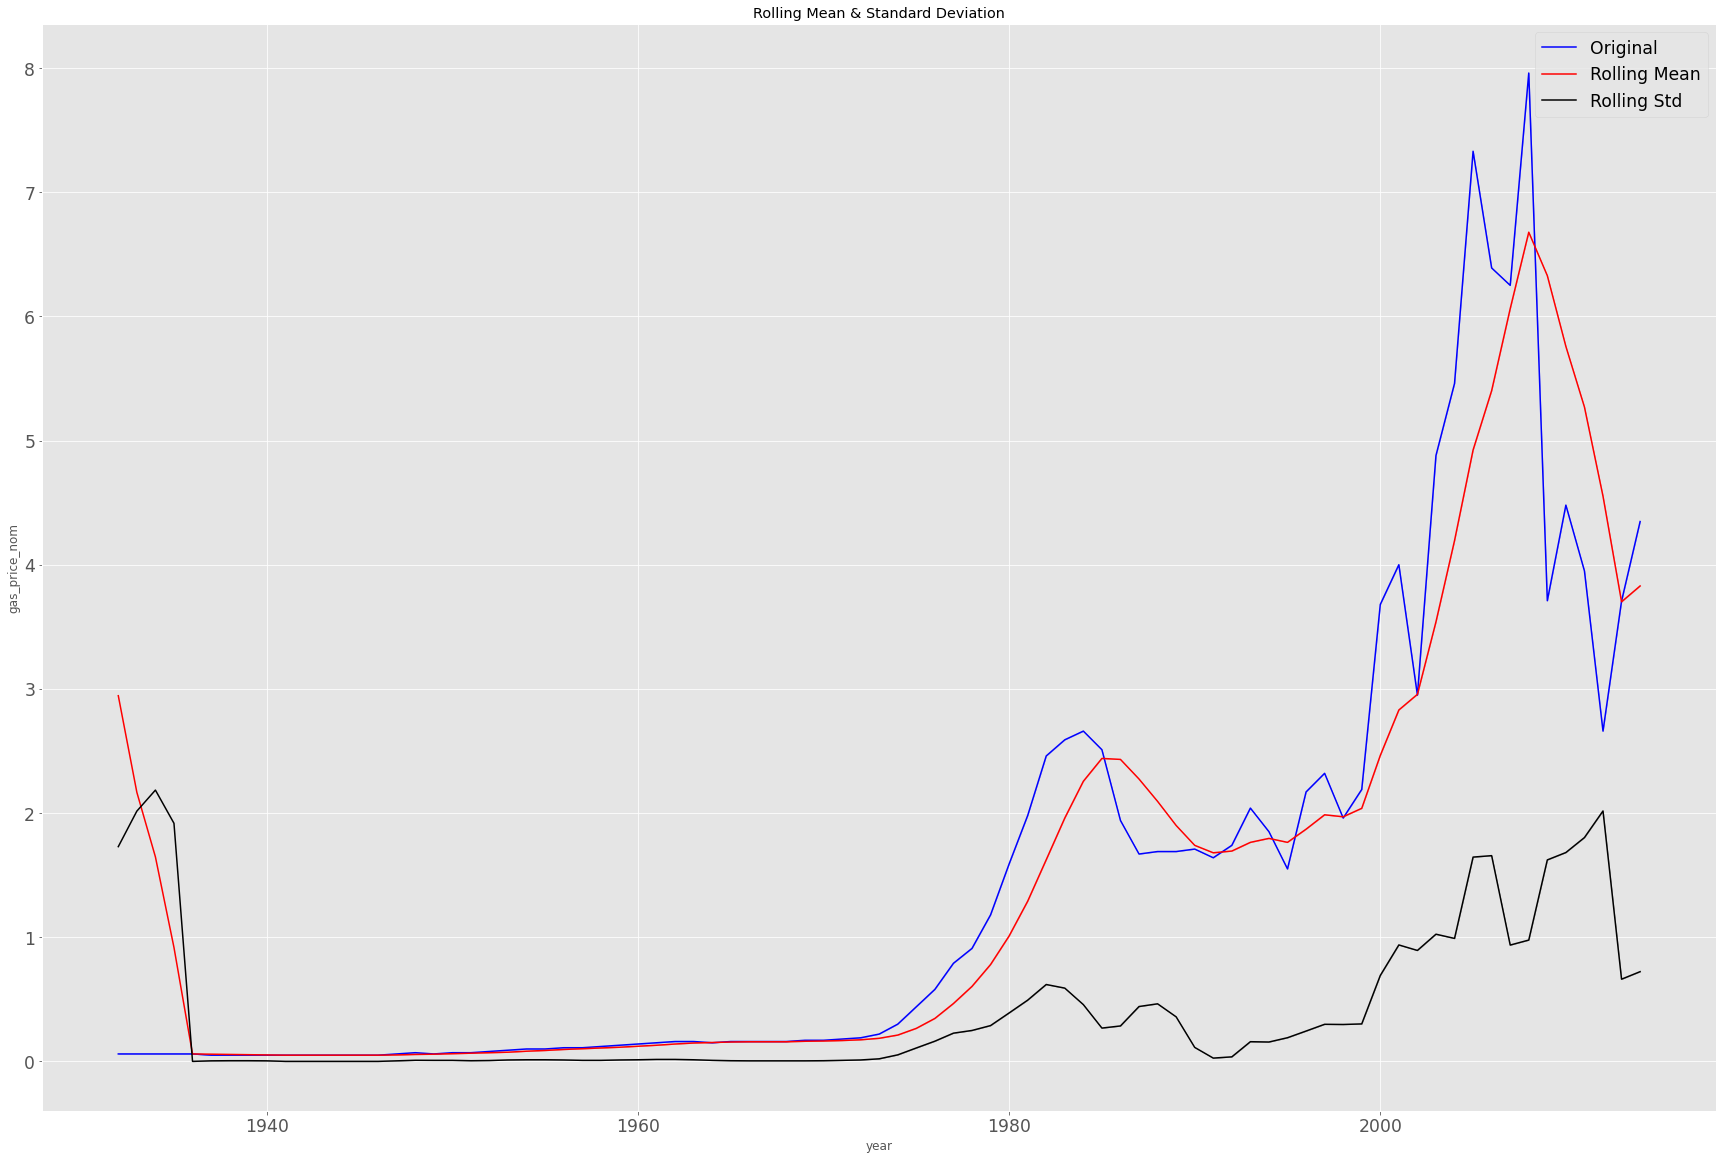

Results of Dickey-Fuller Test:
Test Statistic                   -39.562975
p-value                            0.000000
#Lags Used                        43.000000
Number of Observations Used    15477.000000
Critical Value (1%)               -3.430773
Critical Value (5%)               -2.861727
Critical Value (10%)              -2.566869
dtype: float64


In [323]:
test_stationarity(ts1)

This suggests that we can accept the null hypothesis with a significance level i.e., the series isn't stationary.

Make a Time Series Stationary There are 2 major reasons behind non-stationaruty of a TS:

1.Trend – varying mean over time. For eg, in this case we saw that on average, the oil prices are growing over time.

2.Seasonality – variations at specific time-frames.

# Decomposition of Timeseries for Gas Data

In [324]:
df5["ts1_log1"]=np.log(ts1)

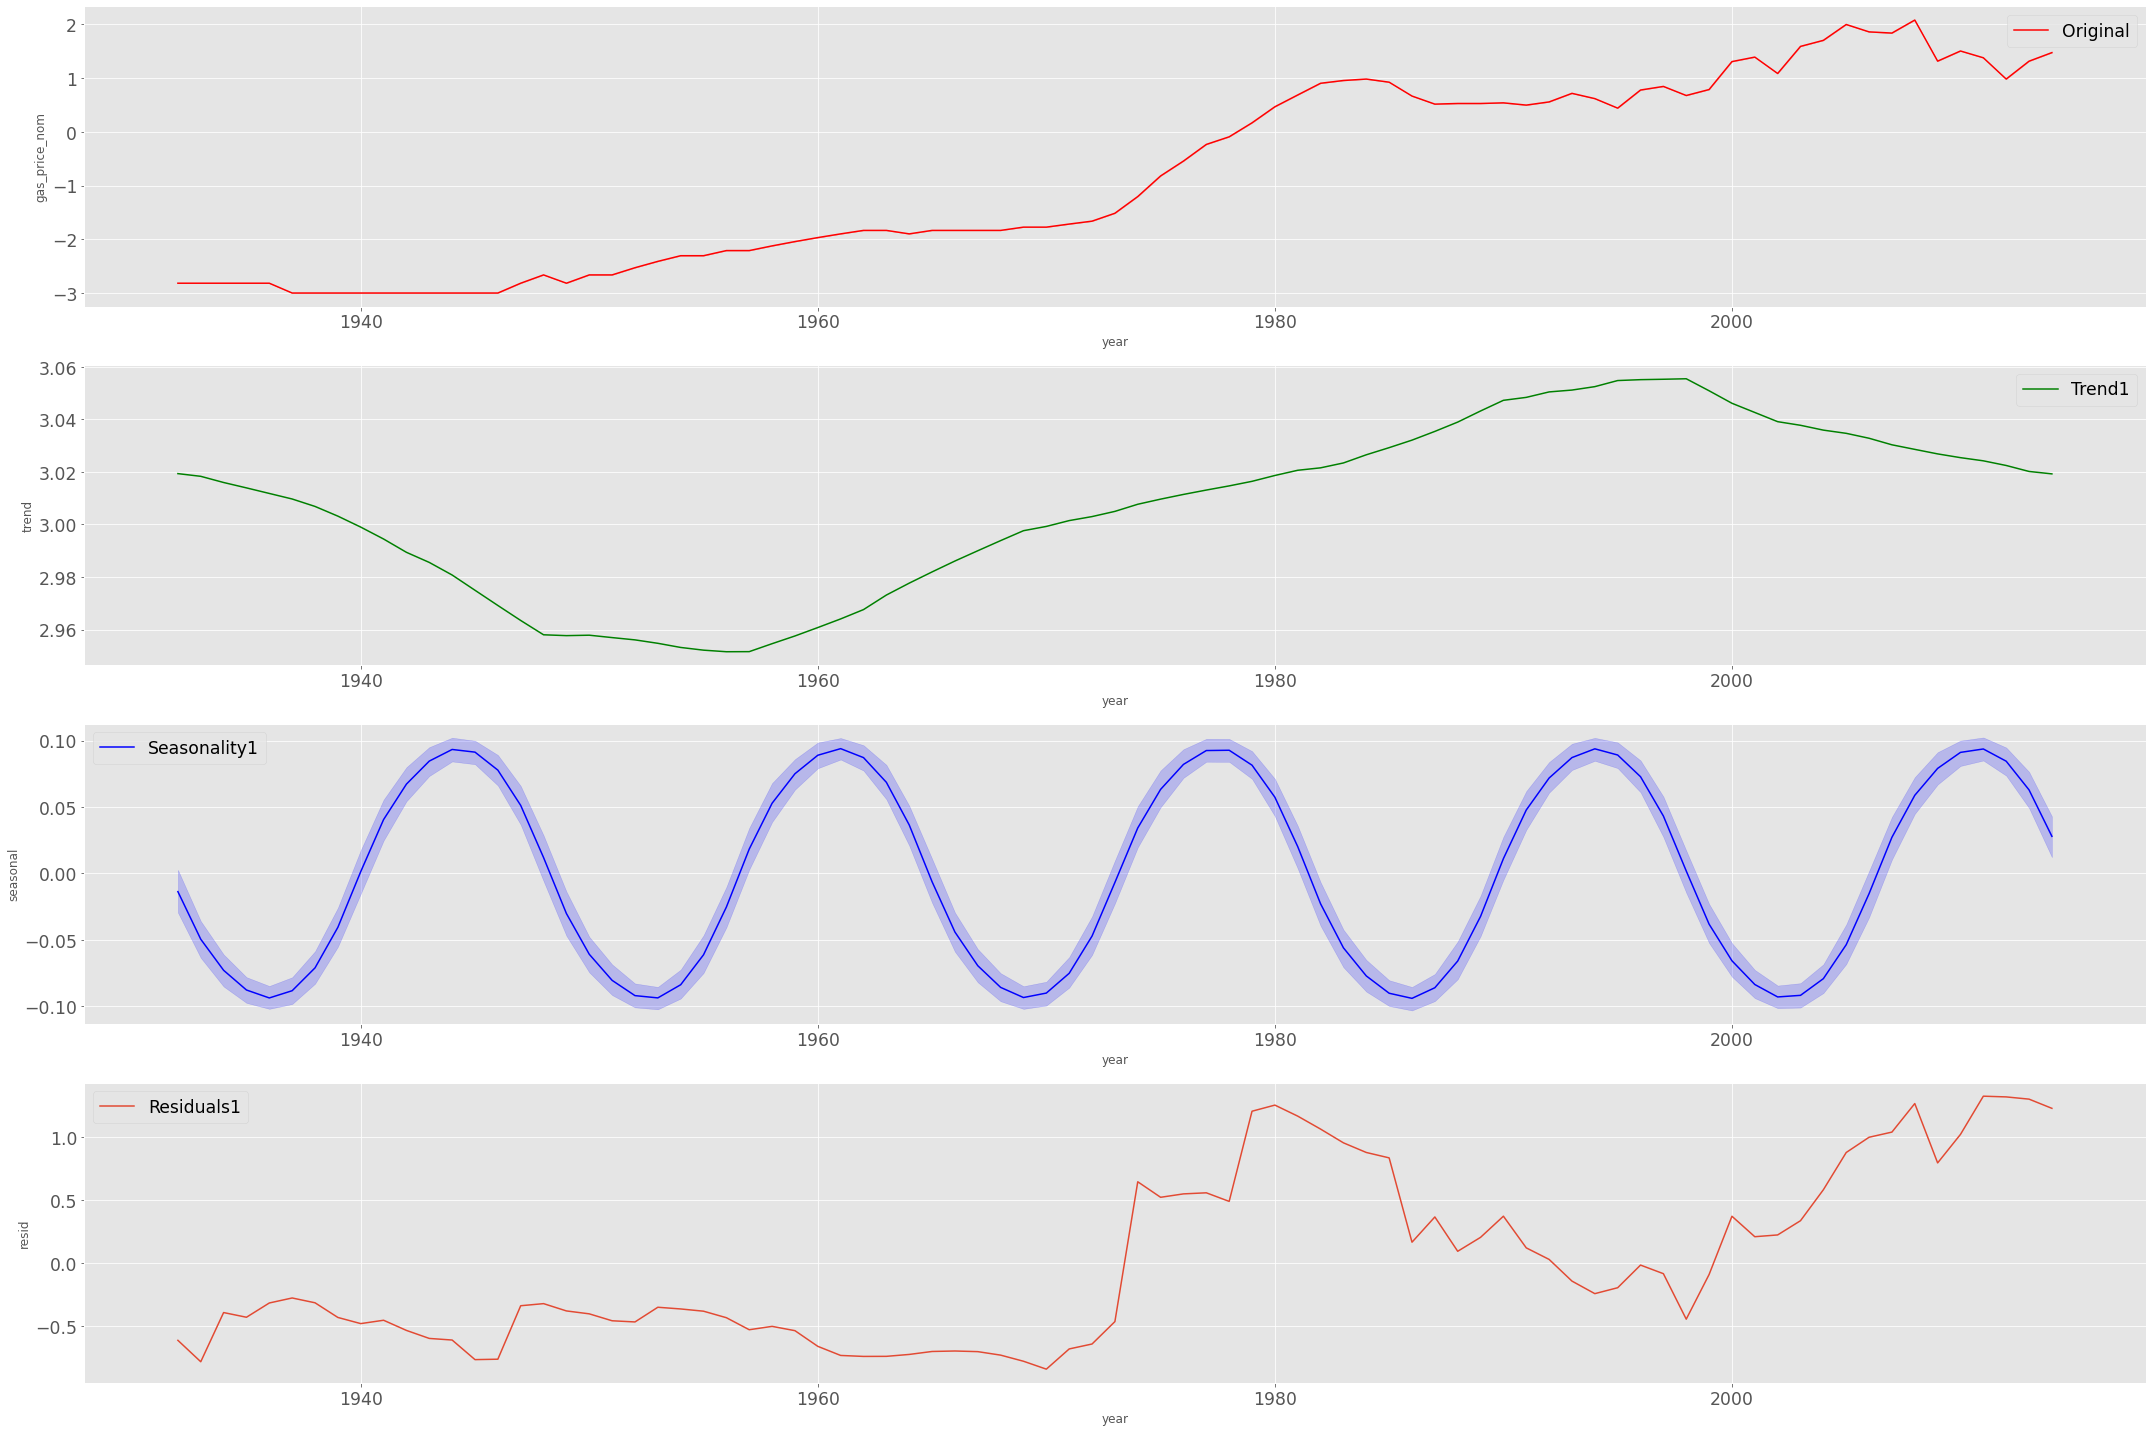

In [325]:
from statsmodels.tsa.seasonal import seasonal_decompose

ts1_log1=np.log(ts1)


decomposition1 = seasonal_decompose(ts1_log1, freq = 365)

trend1 = decomposition1.trend
seasonal1 = decomposition1.seasonal
Residual1 = decomposition1.resid

plt.subplot(411)
sns.lineplot(y=ts1_log, x='year',data=df5,label='Original',color="red")
plt.legend(loc='best')
plt.subplot(412)
sns.lineplot(y=trend,x='year', data=df5, label='Trend1',color="green")
plt.legend(loc='best')
plt.subplot(413)
sns.lineplot(y=seasonal,x='year',data=df5,label='Seasonality1',color="blue")
plt.legend(loc='best')
plt.subplot(414)
sns.lineplot(y=residual,x='year',data=df5, label='Residuals1')
plt.legend(loc='best')
plt.tight_layout()

In [326]:
ts1_decompose = Residual1
ts1_decompose.dropna(inplace=True)
ts1_decompose

182     -1.823659
183     -1.943653
184     -1.748668
185     -1.726564
186     -1.558082
           ...   
15334    1.218766
15335    1.079661
15336    1.451182
15337    1.571775
15338    1.467323
Name: resid, Length: 15157, dtype: float64

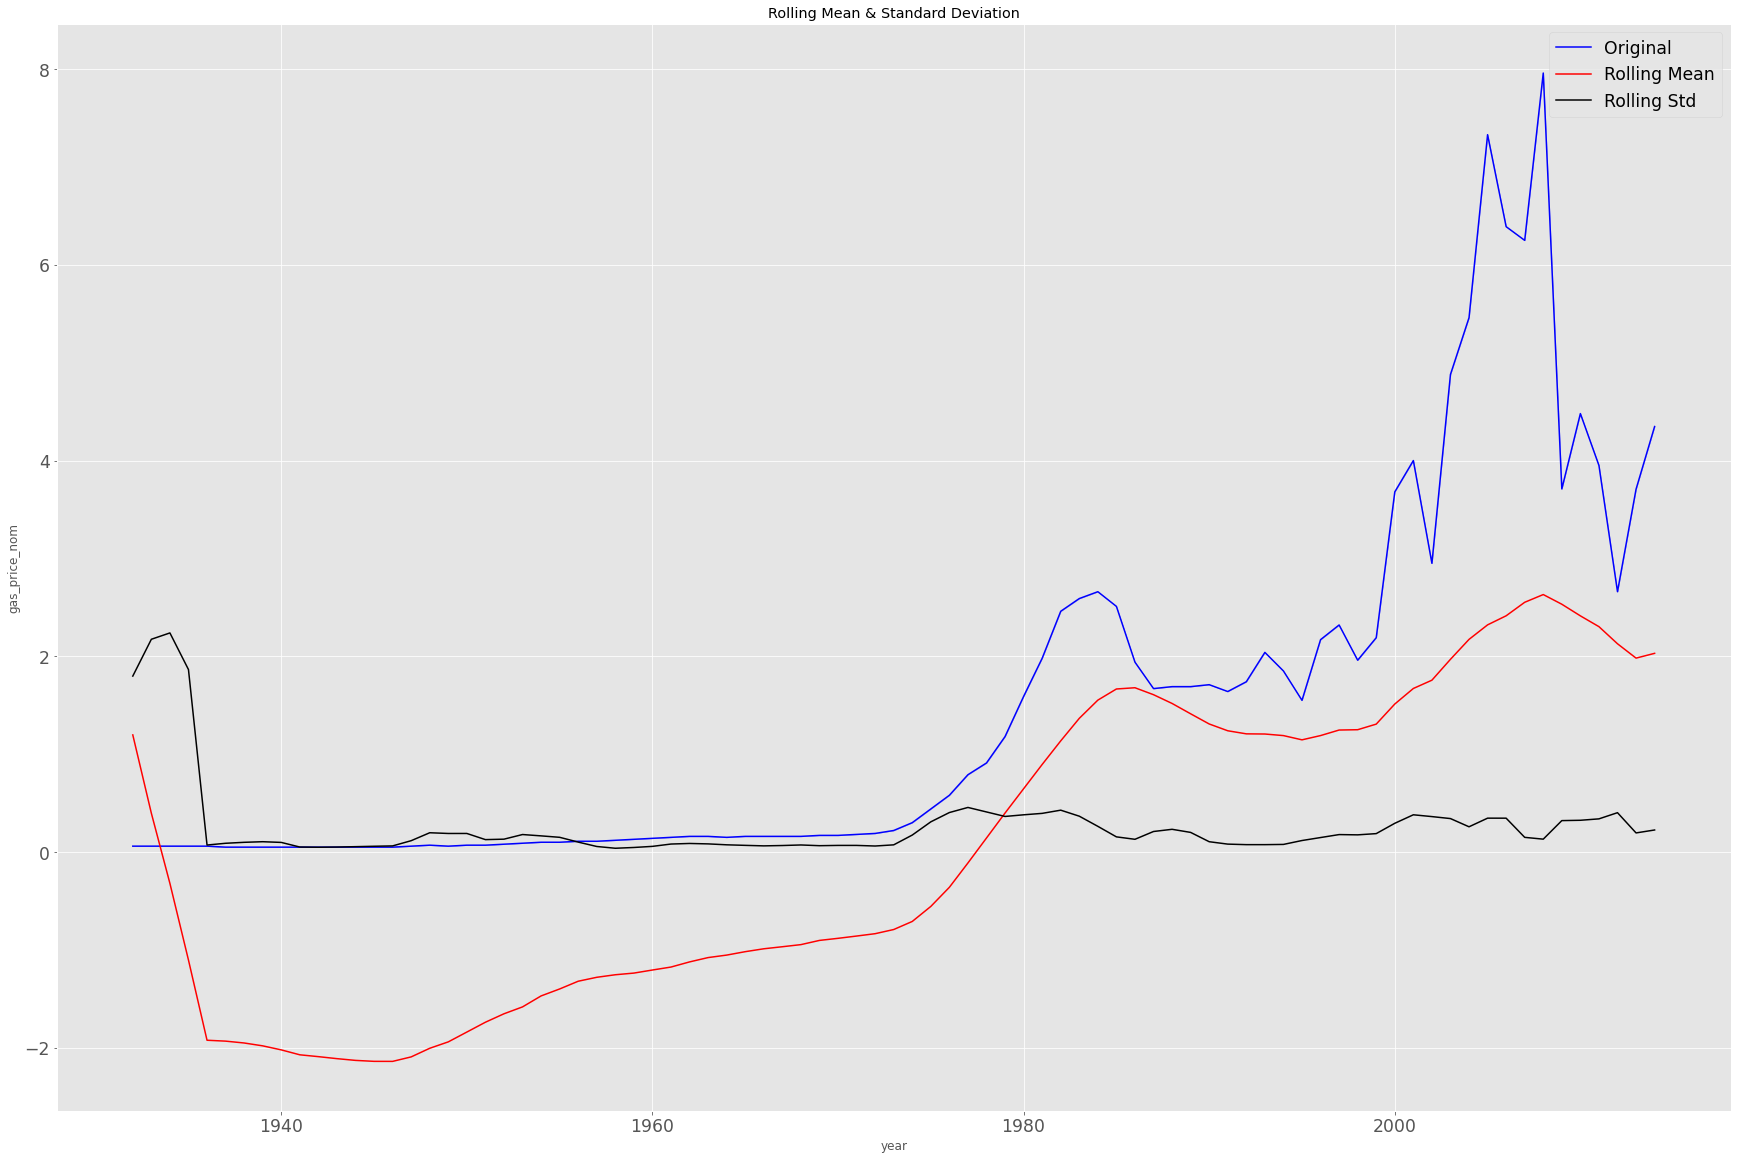

Results of Dickey-Fuller Test:
Test Statistic                   -39.707253
p-value                            0.000000
#Lags Used                        43.000000
Number of Observations Used    15113.000000
Critical Value (1%)               -3.430783
Critical Value (5%)               -2.861731
Critical Value (10%)              -2.566872
dtype: float64


In [327]:
test_stationarity(ts1_decompose)

# AutoCorrelation Function (ACF)

The Pearson’s correlation coefficient is a number between -1 and 1 that describes a negative or positive correlation respectively. A value of zero indicates no correlation.

I calculate the correlation for time series observations with observations with previous time steps, called lags. Because the correlation of the time series observations is calculated with values of the same series at previous times, this is called a serial correlation, or an autocorrelation.

A plot of the autocorrelation of a time series by lag is called the AutoCorrelation Function, or the acronym ACF. This plot is sometimes called a correlogram or an autocorrelation plot.

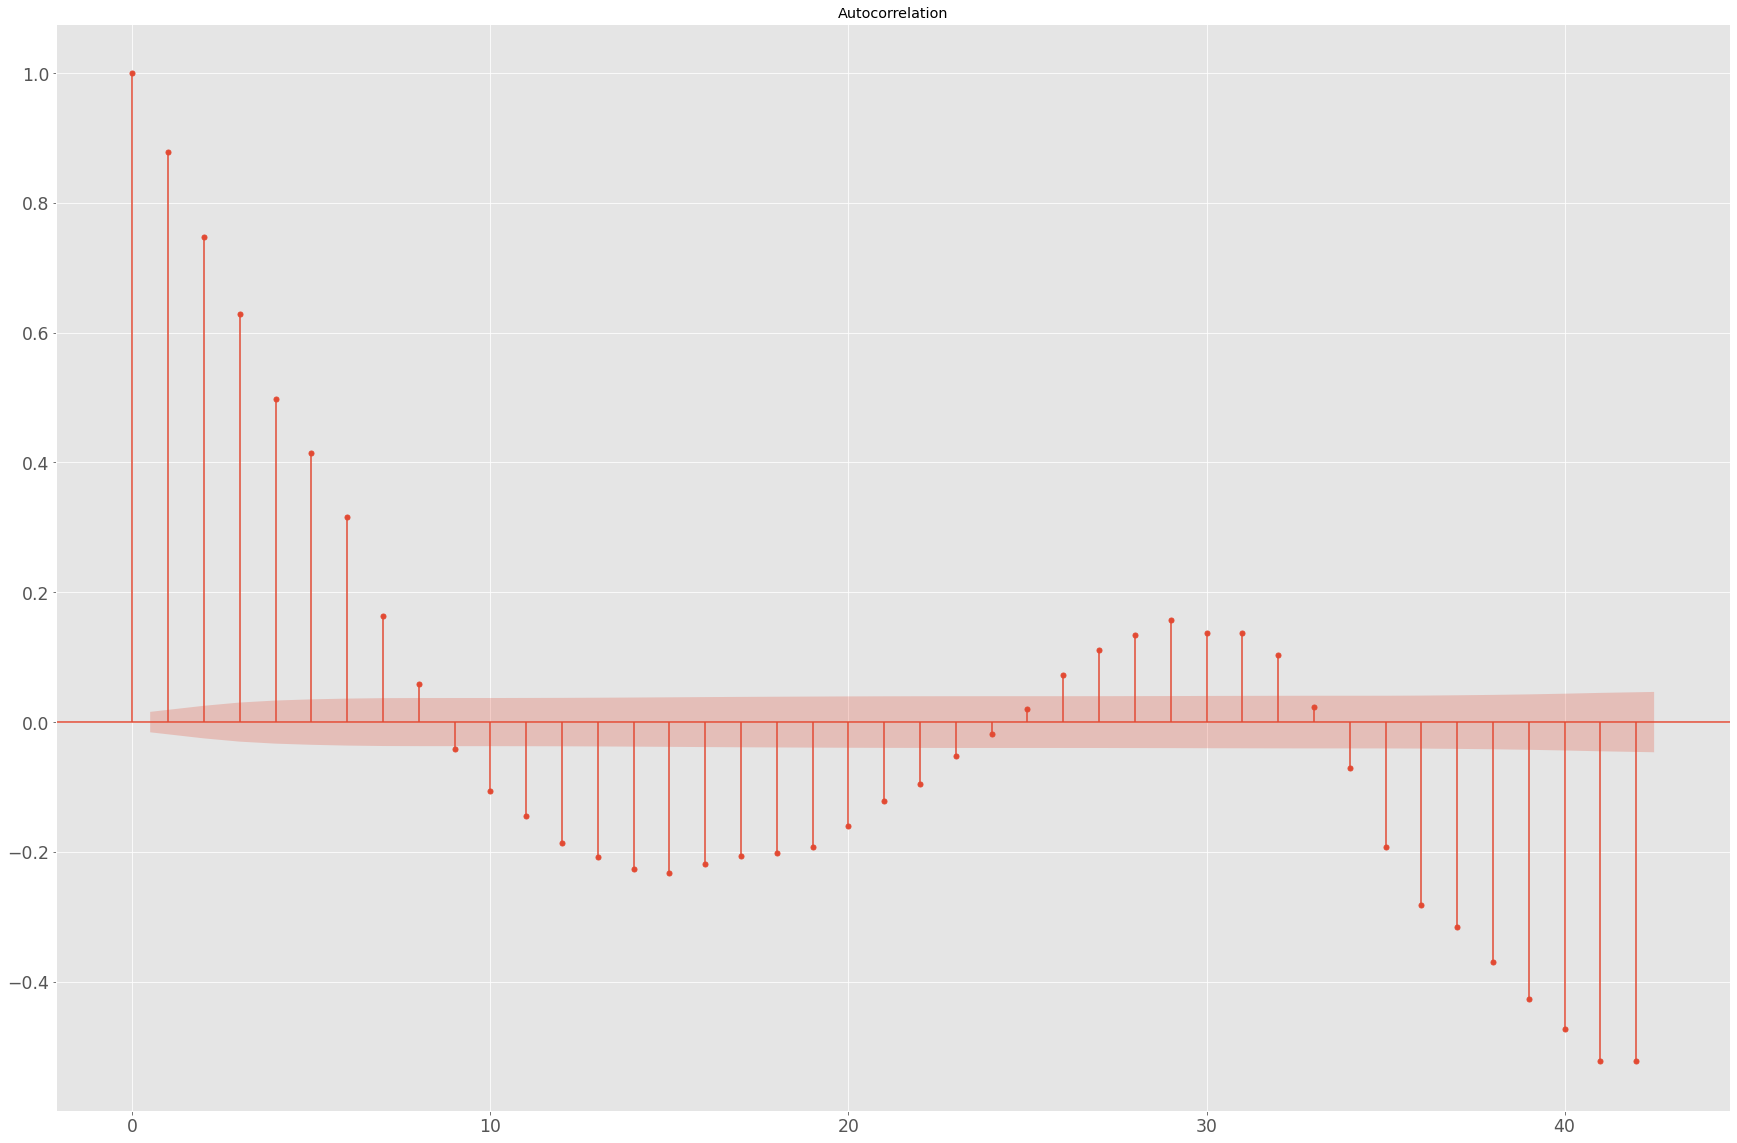

In [328]:
from statsmodels.graphics.tsaplots import plot_acf

## ACF for Oil Data
plot_acf(ts)
plt.show()

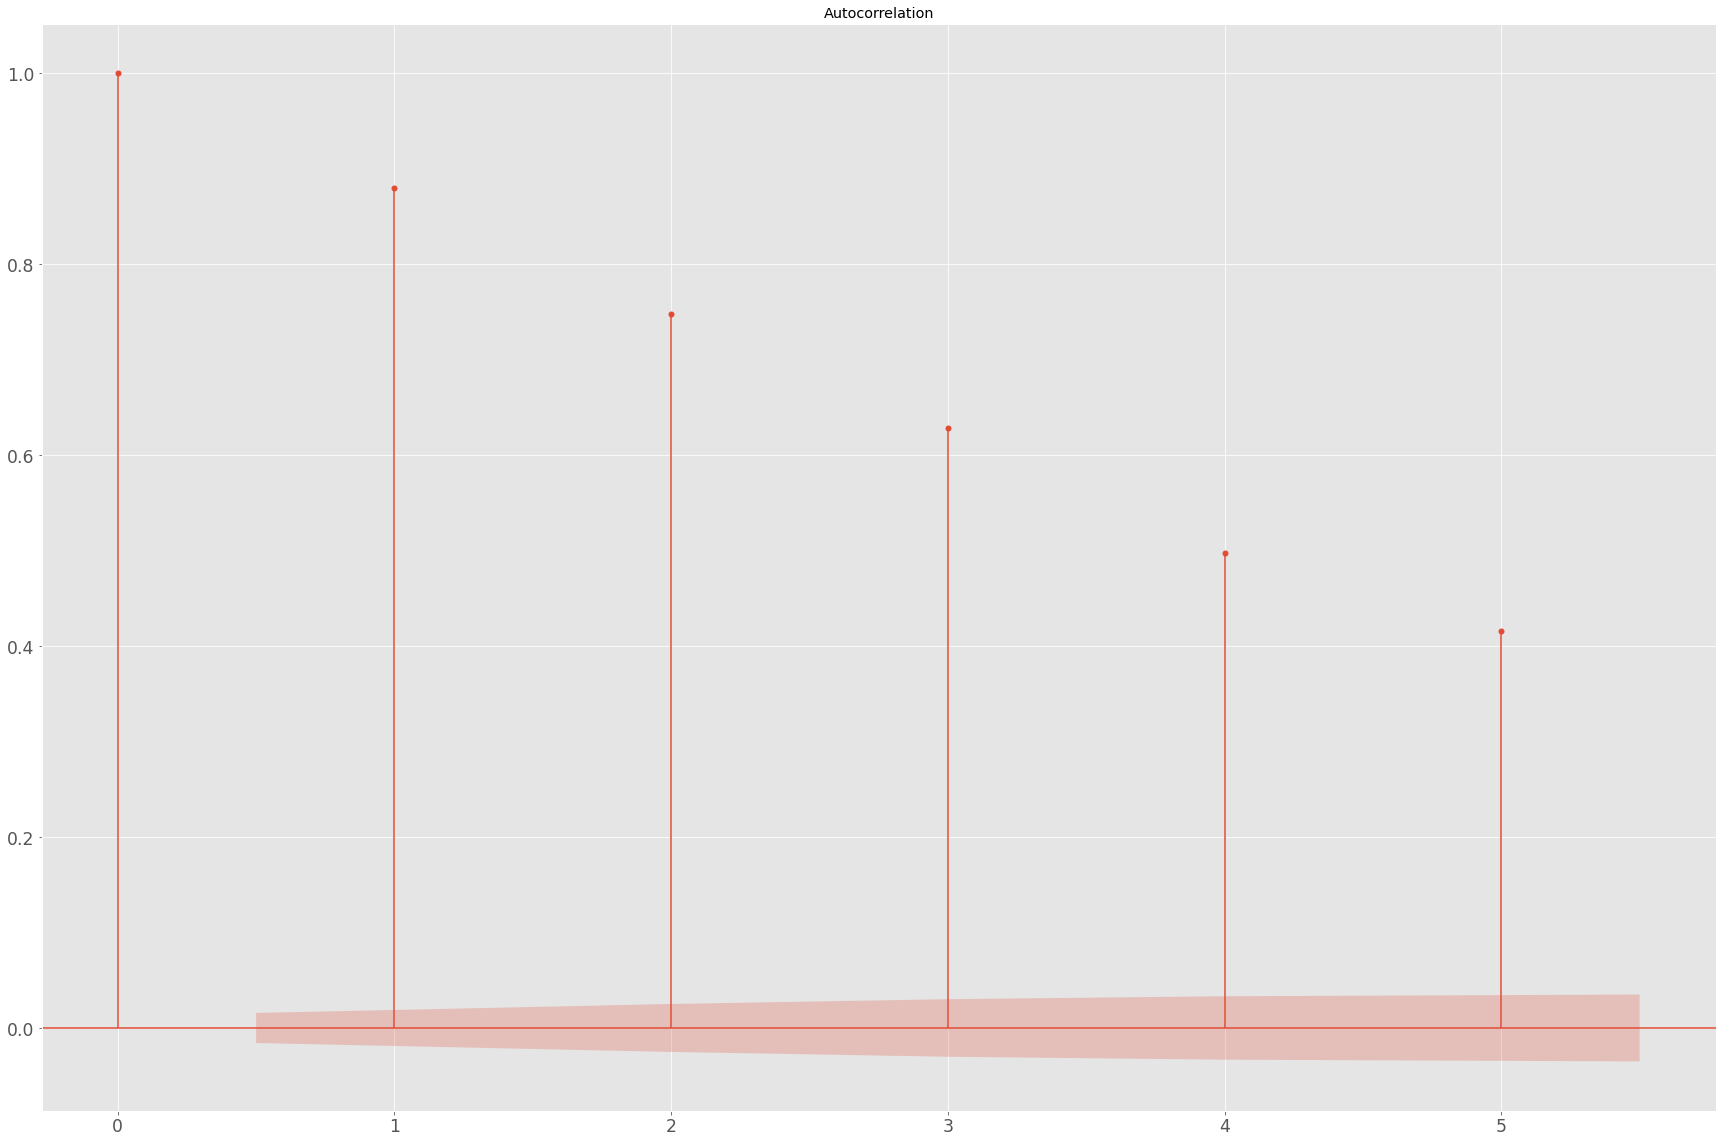

In [329]:
plot_acf(ts, lags=5)
plt.show()

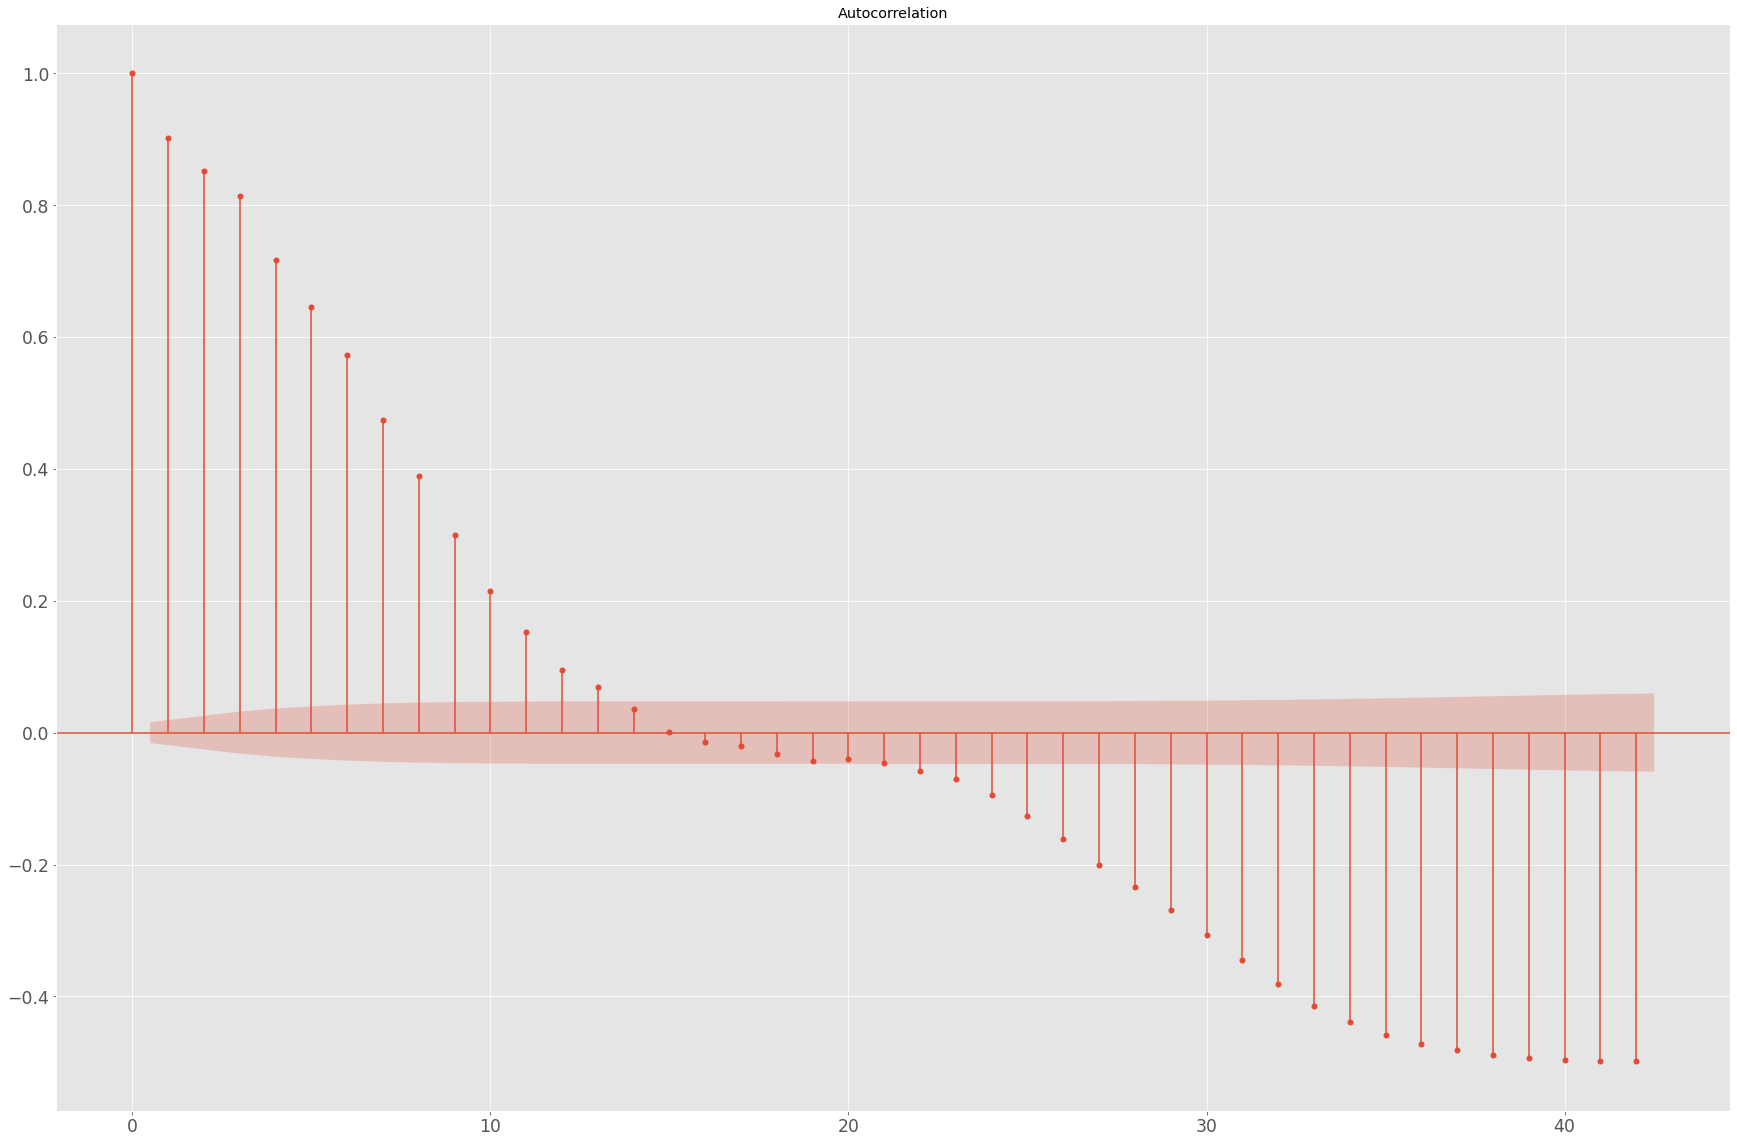

In [330]:
## Acf for gas Data

plot_acf(ts1)
plt.show()


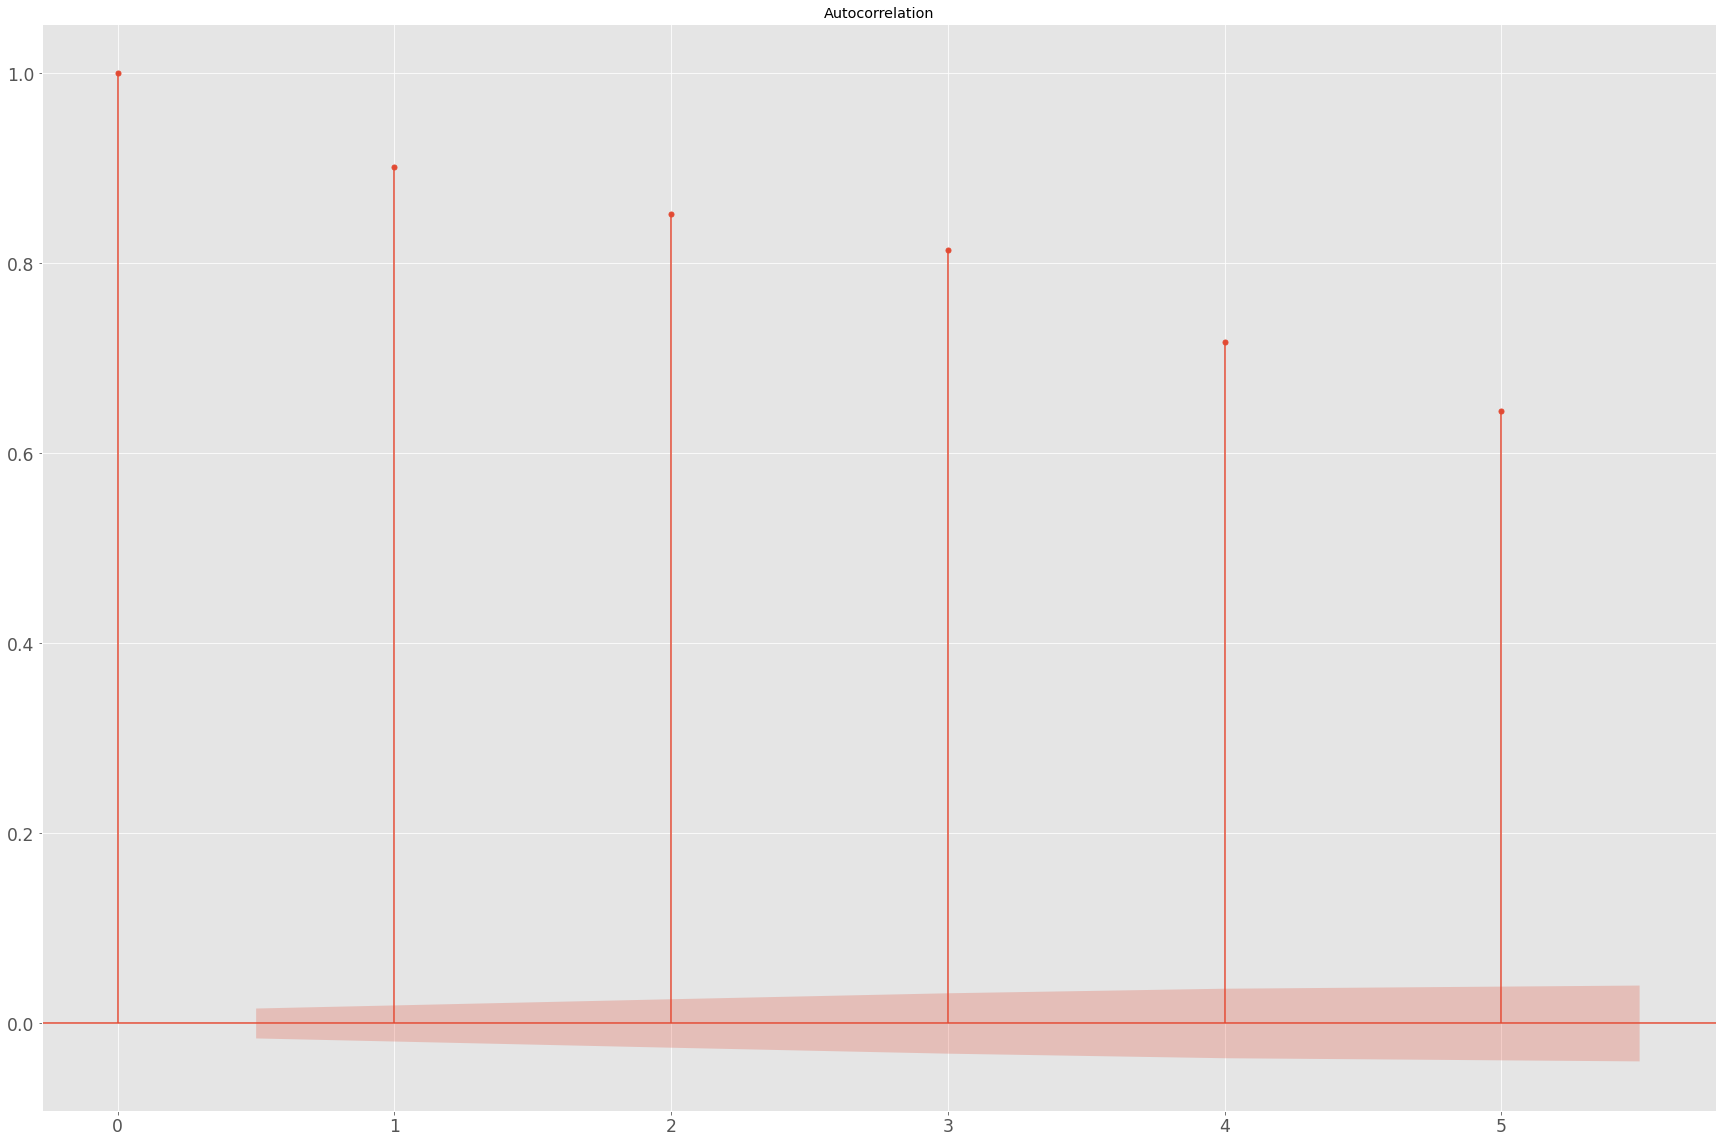

In [331]:
plot_acf(ts1, lags=5)
plt.show()

# Partial AutoCorrelation Function (PCAF)

A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed.

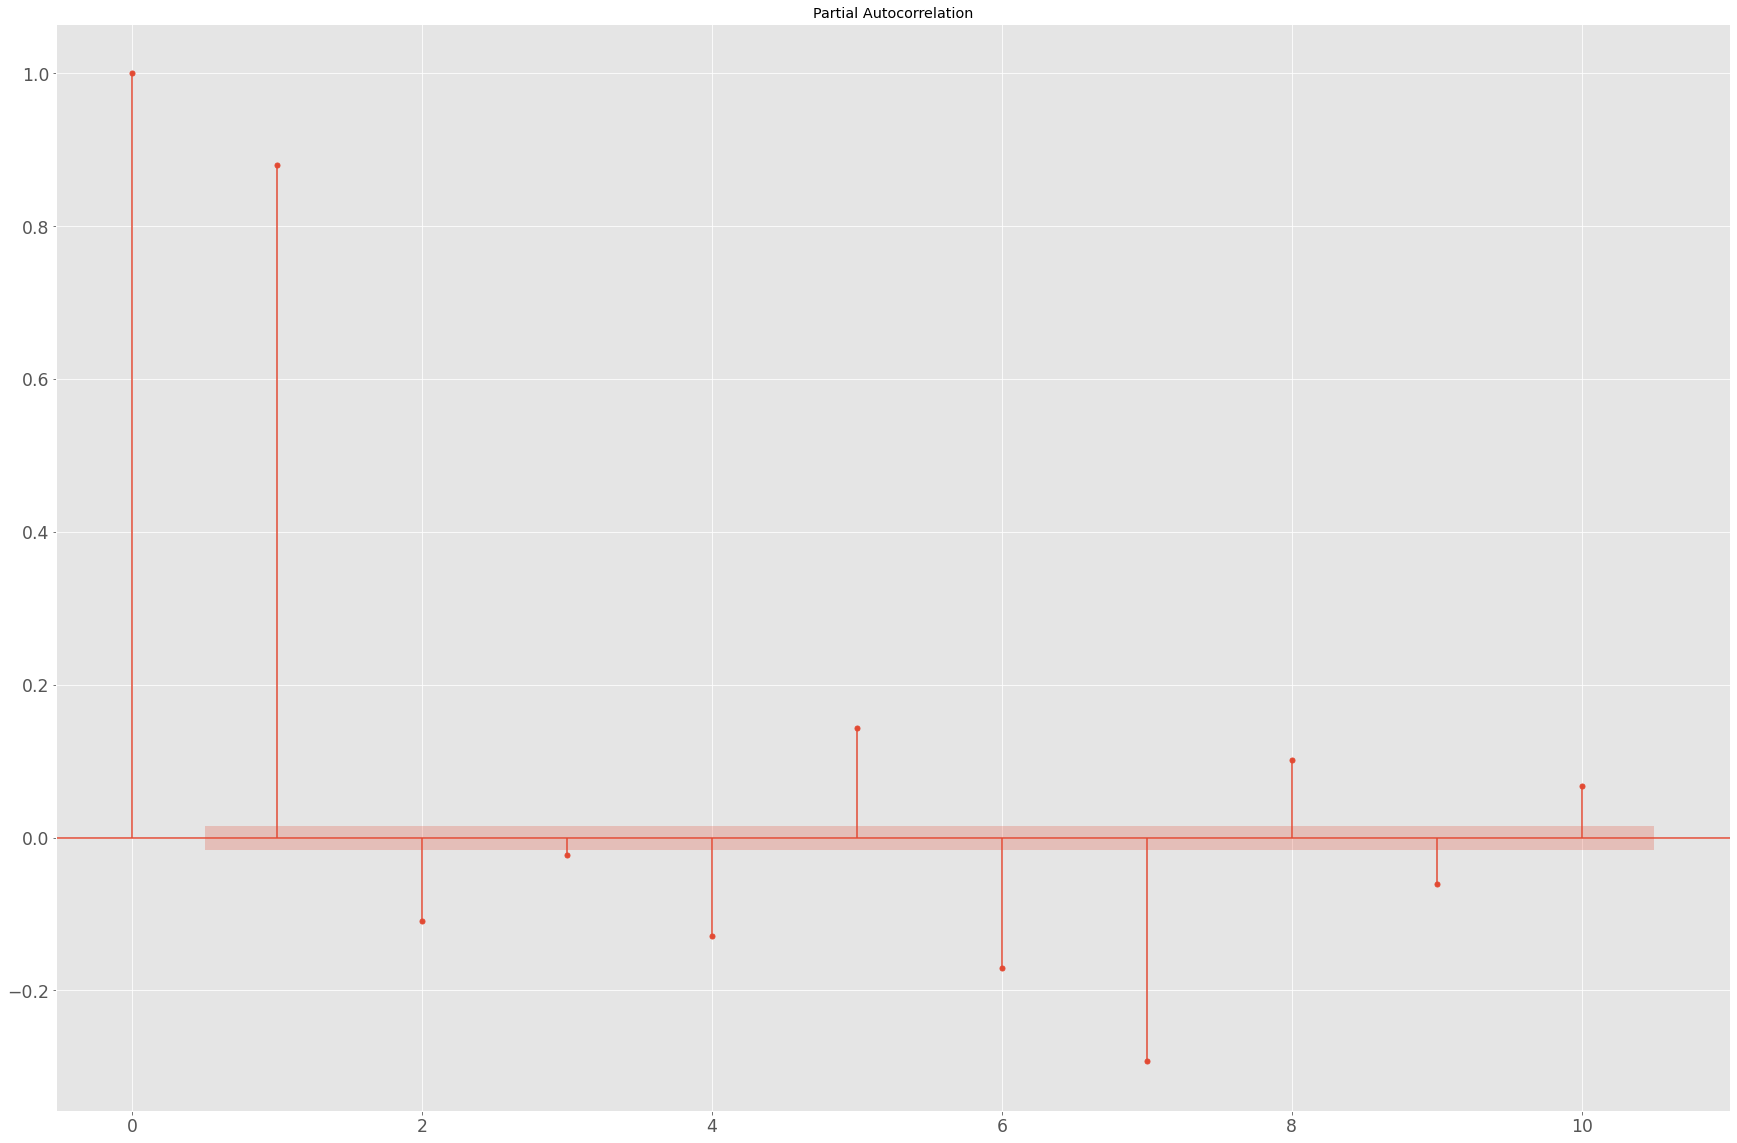

In [332]:
from statsmodels.graphics.tsaplots import plot_pacf

##PCAF for Oil Data
plot_pacf(ts,lags=10)
plt.show()

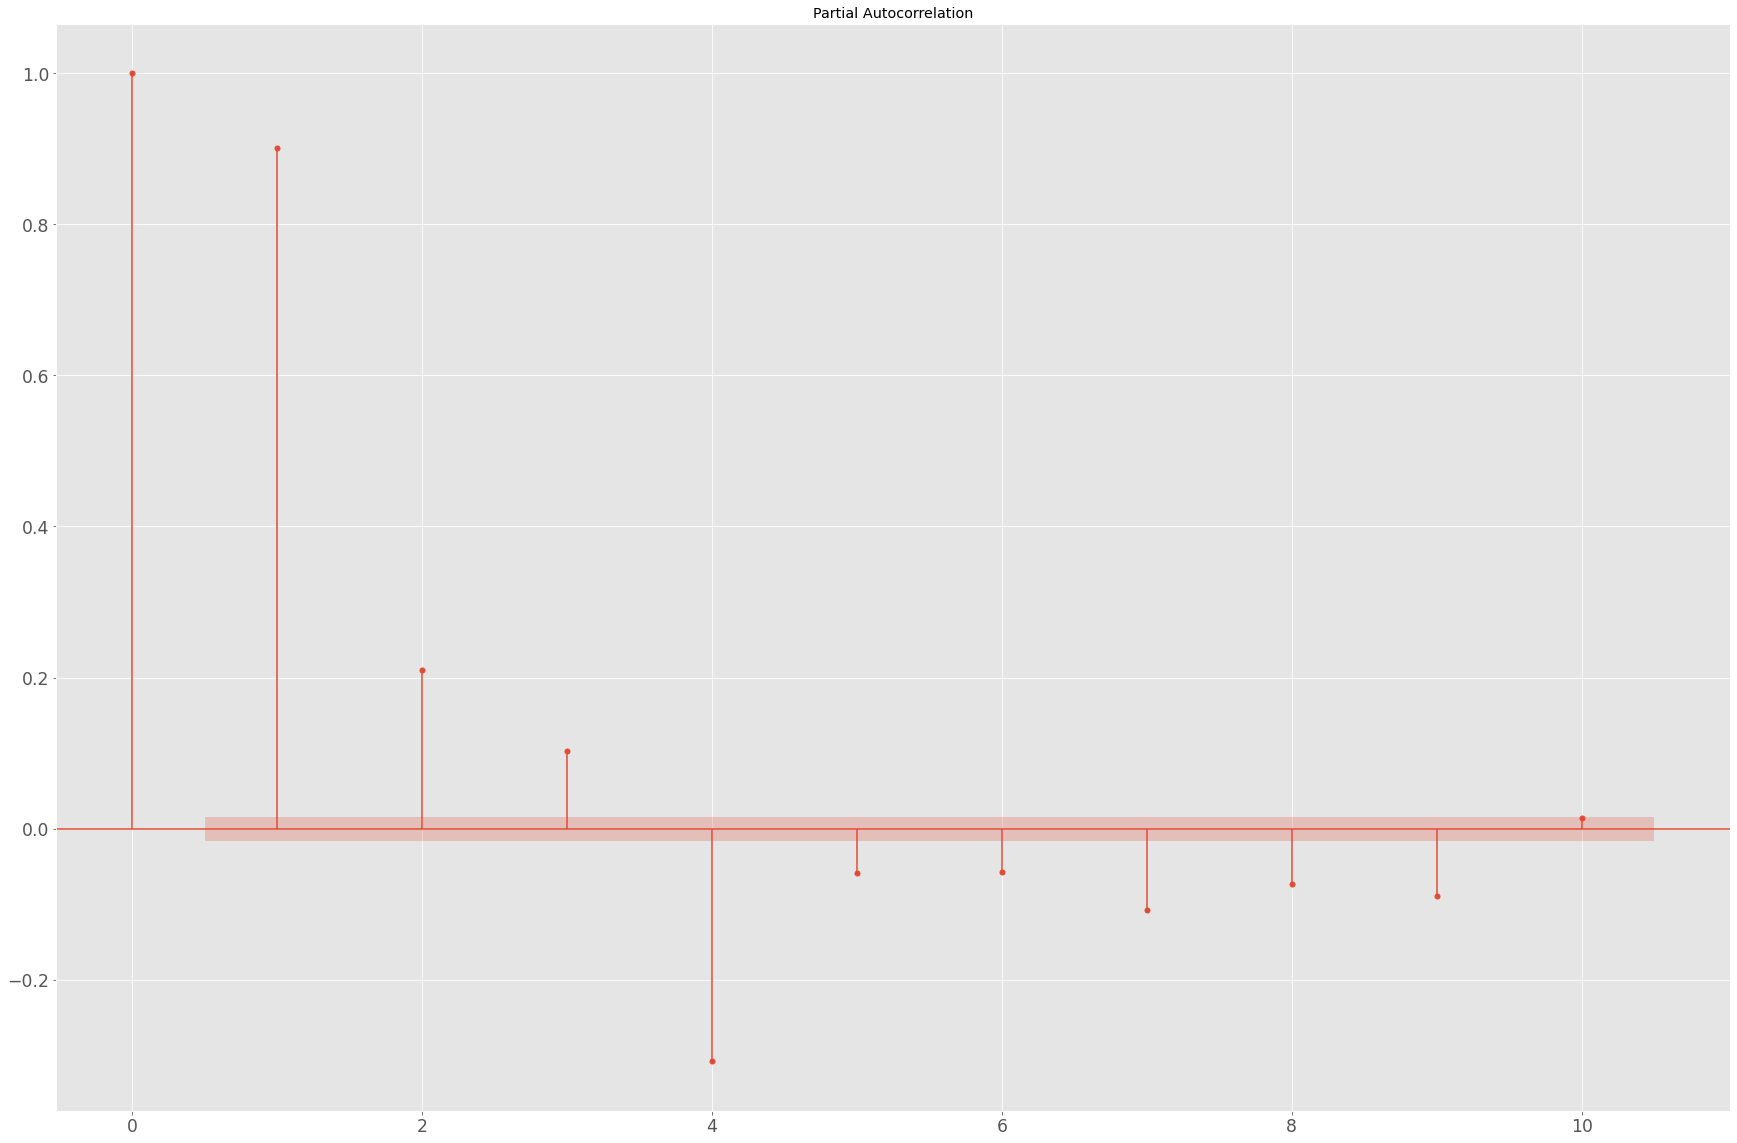

In [333]:
## PCAF for GAS data
plot_pacf(ts1,lags=10)
plt.show()


In this plot, the two dotted lines on either sides of 0 are the confidence interevals. These can be used to determine the ‘p’ and ‘q’ values as:

p – The lag value where the PACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case p=2.

q – The lag value where the ACF chart crosses the upper confidence interval for the first time. If you notice closely, in this case q=1.

d- differences Of time periods. IF we notice clearly , in this case d=5

# Fitting ARIMA model for Oil Data

In [334]:
from statsmodels.tsa.arima_model import ARIMA

model = ARIMA(ts, order=(2, 1, 10))  
results_ARIMA = model.fit(disp=-1)

# Prediction of Oil Prices Based on ARIMA model

In [335]:

df3['arima_pred'] = results_ARIMA.predict(df3["oil_price_2000"].index[1], df3['oil_price_2000'].index[-1], typ="levels")

In [336]:
df3



,year,oil_price_2000,rolmean,rolstd,ts_log,arima_pred
0,1932,10.860860,NaN,NaN,2.385166,NaN
1,1933,8.815239,NaN,NaN,2.176482,10.860885
2,1934,12.715790,NaN,NaN,2.542845,8.861440
3,1935,12.039690,NaN,NaN,2.488209,12.787457
4,1936,13.383210,NaN,NaN,2.594001,11.642370
...,...,...,...,...,...,...
15516,2010,62.778052,NaN,NaN,4.139606,47.124667
15517,2011,85.170708,NaN,NaN,4.444658,58.110541
15518,2012,83.754465,NaN,NaN,4.427889,80.114171
15519,2013,80.319530,NaN,NaN,4.386013,85.341038


Text(0.5, 1.0, 'RMSE: 8.7469')

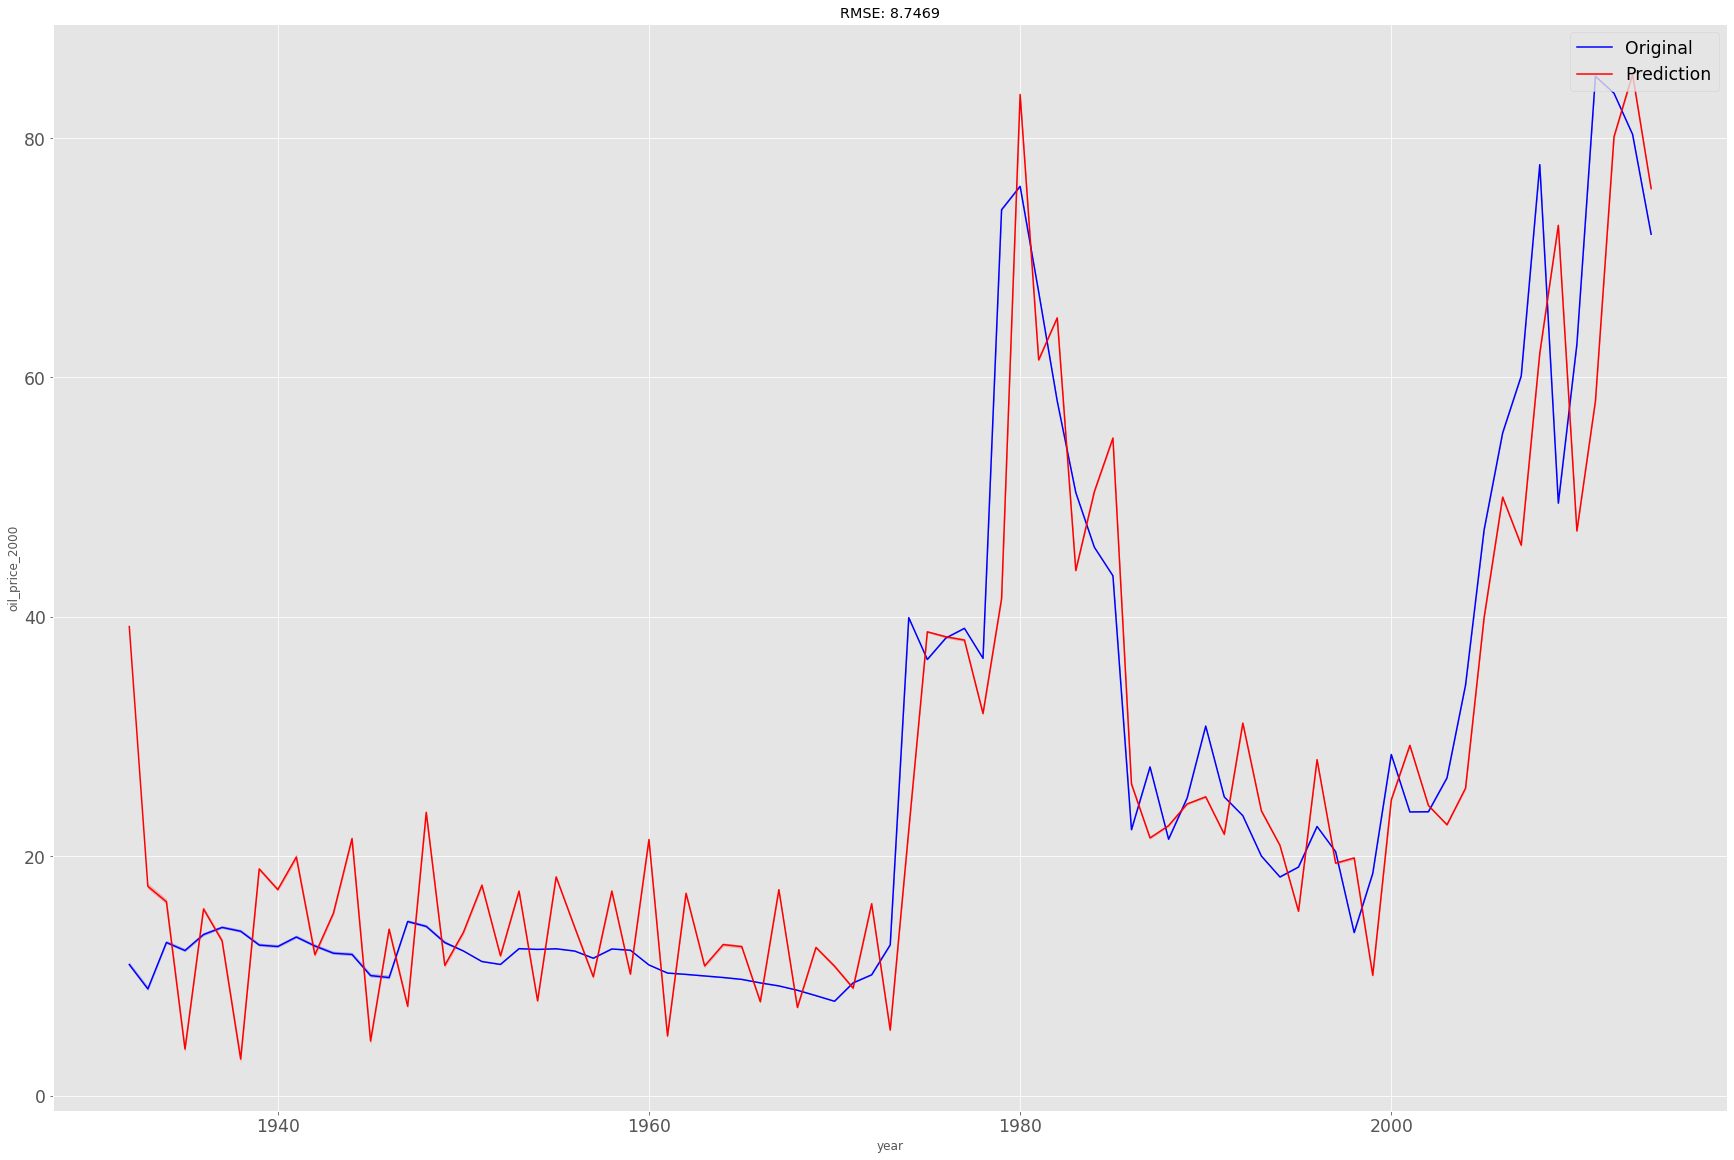

In [337]:
sns.lineplot(y=df3['oil_price_2000'],x='year', data=df3, color='blue',label='Original')
sns.lineplot(y=df3['arima_pred'],x='year',data=df3,color='red', label='Prediction')
plt.legend(loc=1)

##plt.title('RMSE: %.4f'% np.sqrt(np.sum((arima_pred-df3["oil_price_2000"].iloc[6000:])**2)/len(df3["oil_price_2000"].iloc[6000:])))

plt.title('RMSE: %.4f'% np.sqrt(np.sum((df3['arima_pred'] - df3['oil_price_2000'])**2)/len(df3['oil_price_2000'])))

In [338]:
len(df3['arima_pred'])

15521

Our ARIMA Model predicts 92% of the Oil prieces in Our Data.

# Fitting ARIMA Model for Gas Data

In [ ]:
from statsmodels.tsa.arima_model import ARIMA

model1 = ARIMA(ts1, order=(2, 1, 10))  
results1_ARIMA = model1.fit(disp=-1)


# Prediction of Gas Prices Based on ARIMA Model

In [ ]:
df5['arima1_pred1'] = results1_ARIMA.predict(df5["gas_price_nom"].index[1], df5['gas_price_nom'].index[-1], typ="levels")

In [ ]:
df5

In [ ]:
sns.lineplot(y=df5['gas_price_nom'],x='year', data=df5, color='blue',label='Original')
sns.lineplot(y=df5['arima1_pred1'],x='year',data=df5,color='red', label='Prediction')
plt.legend(loc=1)

##plt.title('RMSE: %.4f'% np.sqrt(np.sum((arima_pred-df3["oil_price_2000"].iloc[6000:])**2)/len(df3["oil_price_2000"].iloc[6000:])))

plt.title('RMSE: %.4f'% np.sqrt(np.sum((df5['arima1_pred1'] - df5['gas_price_nom'])**2)/len(df5['gas_price_nom'])))

In [ ]:
len(df5['arima1_pred1'])

Our ARIMA Model predicts 99.5% of the Gas prieces in Our Data.